# Topic 29: Decision Trees

- onl01-dtsc-ft-022221
- 05/11/21


## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

## Questions/Comments?:

- 

# Introduction to Decision Trees

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',lambda x: f"{x:.2f}")

## Activity: Data Partitioning

In [2]:
## Adding parent folder to path for importing helper_functions
import os,sys
module_path = os.path.abspath(os.pardir)#os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from helper_functions import *

In [3]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use(['seaborn-talk'])#,'seaborn'])

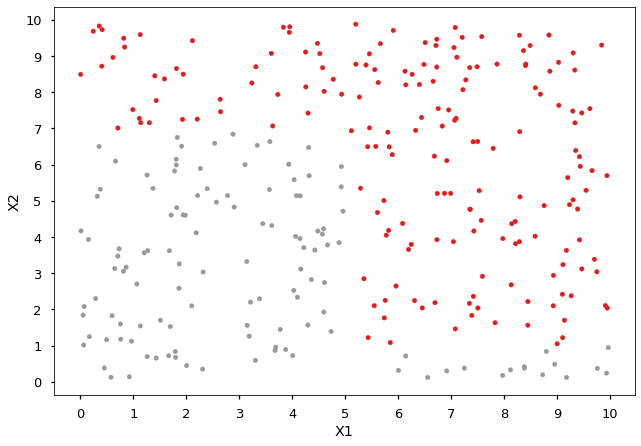

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [5]:
# 'horizontal' or 'vertical'
q1_direction = 'vertical'
# Between 0 and 10
q1_threshold = 5

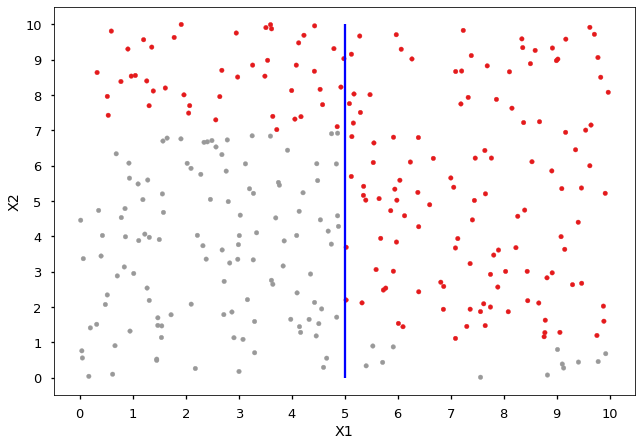

In [6]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

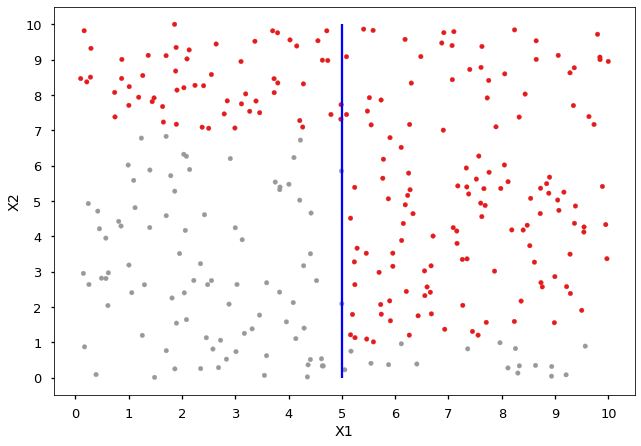

In [7]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [8]:
# 'horizontal' or 'vertical'
q2_direction = 'horizontal'
# Between 0 and 10
q2_threshold = 7


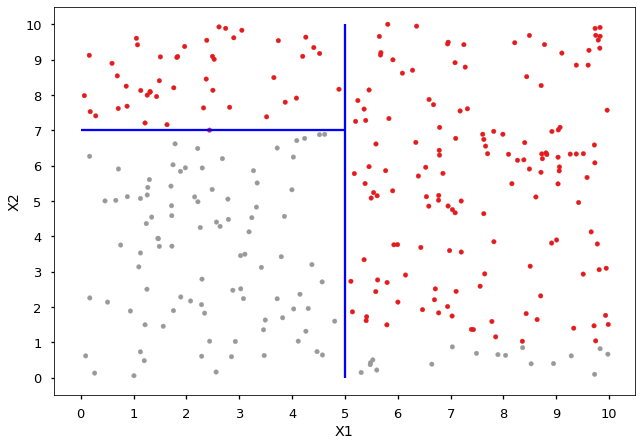

In [9]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

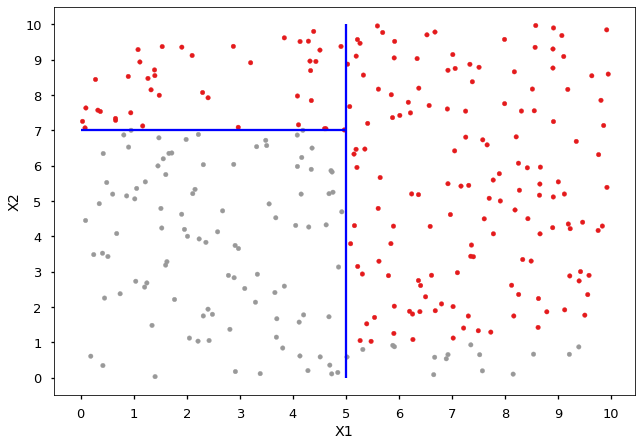

In [10]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [11]:
# 'horizontal' or 'vertical'
q3_direction = 'horizontal'
# Between 0 and 10
q3_threshold = 1

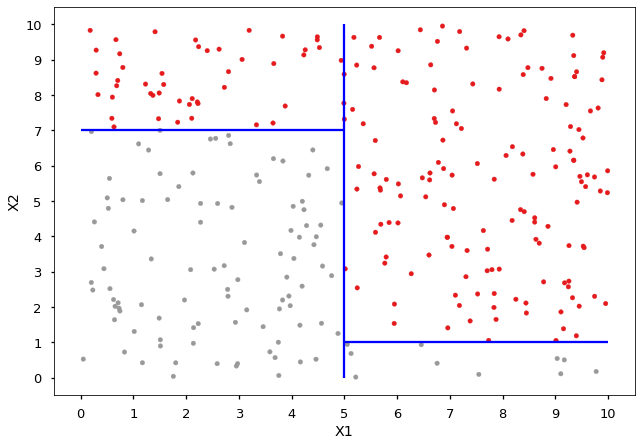

In [12]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

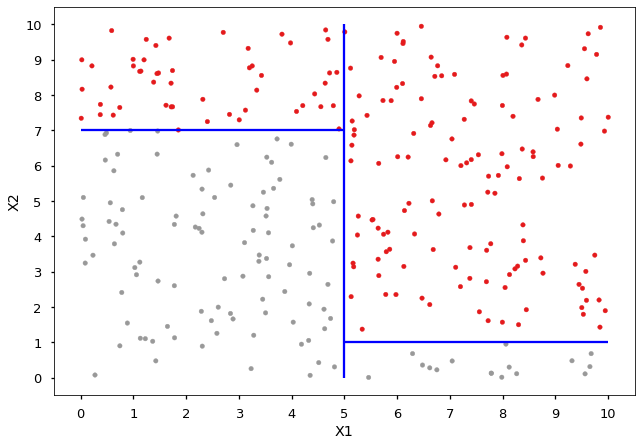

In [13]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

## Decision Trees Overview

- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=75%>




## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 

## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'entropy'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.

    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Preprocessing our data with  `Pipelines` &  `ColumnTransformer`

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)


- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## New Imports
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer

In [15]:
# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-knn-with-scikit-learn-lab/master/titanic.csv')
raw_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'],
            inplace=True)

# Print the head of the DataFrame to ensure everything loaded correctly 
df = raw_df.copy()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S
887,1,1,female,19.00,0,0,30.00,S
888,0,3,female,nan,1,2,23.45,S
889,1,1,male,26.00,0,0,30.00,C


In [16]:
## Get X, y and train-test-split
target = 'Survived'

X = df.drop(columns=target).copy()
y = df[target].copy()

## train tst split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,
                                                    random_state=42)
[print(var.shape) for var in [X_train, X_test]];

(668, 7)
(223, 7)


## Preparing Preprocessing Pipelines 

### Required Preprocessing

> Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:
1. ~~Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) ~~
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

> #### Normalizing the data 
* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

### Make a Pipeline for Numeric Columns

In [17]:
## Get list of numeric features to sacle
num_cols = list(X_train.select_dtypes('number').columns)
num_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
## Create a num_trasnformer pipeline 
## that will impute using median and then calculate z-scores
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])

In [19]:
## Test our num_transformer pipeline .fit_transform X_train
num_transformer.fit_transform(X_train[num_cols])

array([[-1.62051704, -0.08764782, -0.46765956, -0.46887833, -0.0325683 ],
       [ 0.80934914, -0.31820308, -0.46765956, -0.46887833, -0.48733085],
       [-0.40558395, -0.39505484, -0.46765956,  2.04687047, -0.34285405],
       ...,
       [ 0.80934914,  0.91142501,  1.22097065, -0.46887833, -0.35045024],
       [-1.62051704, -1.1635724 ,  0.37665554,  2.04687047,  1.7030926 ],
       [-1.62051704, -0.62561011, -0.46765956,  0.78899607,  0.8747751 ]])

### Make a Pipeline for Categorical Features


In [20]:
## Get list of cat features to encode
cat_cols = X_train.select_dtypes('O').columns.tolist()
cat_cols

['Sex', 'Embarked']

In [21]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [22]:
## Test cat_transformer 
cat_transformer.fit_transform(X_train[cat_cols])

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

 ##  Putting it all together with `ColumnTransformer`



- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [23]:
from sklearn.compose import ColumnTransformer,make_column_transformer

In [24]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

### Viewing `preprocessing` Pipeline

In [25]:
from sklearn import set_config
set_config(display='diagram')

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

In [26]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

array([[-1.62051704, -0.08764782, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.80934914, -0.31820308, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40558395, -0.39505484, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.80934914,  0.91142501,  1.22097065, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62051704, -1.1635724 ,  0.37665554, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62051704, -0.62561011, -0.46765956, ...,  0.        ,
         1.        ,  0.        ]])

### Getting Feature Names from our `ColumnTransformer`

In [27]:
set_config(display='text')
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

In [28]:
## Explore the named_transformers
preprocessing.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scale', StandardScaler())]),
 'cat': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('encoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [29]:
## Slice out the 'cat' transformer and inspect .named_steps
preprocessing.named_transformers_['cat'].named_steps

{'imputer': SimpleImputer(fill_value='missing', strategy='constant'),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [30]:
## Slice out the 'encoder' from the cat transformers' named_steps
preprocessing.named_transformers_['cat'].named_steps['encoder']

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [31]:
## Use the encoder's .get_feature_names
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
feature_names

['Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [32]:
## Find the encoder inside the cat transformer
X_cols = num_cols+feature_names
X_cols

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [33]:
len(X_cols)

11

In [34]:
X_train_tf.shape

(668, 11)

In [35]:
## Fit preprocessing pipeline and pull out the feature names and X_cols
preprocessing.fit(X_train)
feature_names = list(preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols))
X_cols = num_cols+feature_names


## Tranform X_train and X_test and make into DataFrames
X_train_df = pd.DataFrame(preprocessing.transform(X_train),columns=X_cols,
                          index=X_train.index)
X_test_df = pd.DataFrame(preprocessing.transform(X_test),columns=X_cols,
                         index=X_test.index)
X_train_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
298,-1.62,-0.09,-0.47,-0.47,-0.03,0.00,1.00,0.00,0.00,1.00,0.00
884,0.81,-0.32,-0.47,-0.47,-0.49,0.00,1.00,0.00,0.00,1.00,0.00
247,-0.41,-0.40,-0.47,2.05,-0.34,1.00,0.00,0.00,0.00,1.00,0.00
478,0.81,-0.55,-0.47,-0.47,-0.48,0.00,1.00,0.00,0.00,1.00,0.00
305,-1.62,-2.17,0.38,2.05,2.31,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
106,0.81,-0.63,-0.47,-0.47,-0.48,1.00,0.00,0.00,0.00,1.00,0.00
270,-1.62,-0.09,-0.47,-0.47,-0.02,0.00,1.00,0.00,0.00,1.00,0.00
860,0.81,0.91,1.22,-0.47,-0.35,0.00,1.00,0.00,0.00,1.00,0.00
435,-1.62,-1.16,0.38,2.05,1.70,1.00,0.00,0.00,0.00,1.00,0.00


In [36]:
X_train_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
count,668.00,668.00,668.00,668.00,668.00,668.00,668.00,668.00,668.00,668.00,668.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.34,0.66,0.18,0.09,0.74,0.00
std,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.38,0.28,0.44,0.05
min,-1.62,-2.21,-0.47,-0.47,-0.62,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.41,-0.55,-0.47,-0.47,-0.47,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.81,-0.09,-0.47,-0.47,-0.34,0.00,1.00,0.00,0.00,1.00,0.00
75%,0.81,0.45,0.38,-0.47,-0.03,1.00,1.00,0.00,0.00,1.00,0.00
max,0.81,3.91,6.29,7.08,9.31,1.00,1.00,1.00,1.00,1.00,1.00


# `DecisionTreeClassifier` with scikit-learn

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Imports for visualizing trees
from sklearn.tree import plot_tree,export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

### Functions from Prior Classes

In [38]:
## Modified version of our simple eval function from Topic 25 Part 2 Study Group
# - Added X_train and y_train for if we want scores for both train and test
def evaluate_classification(model, X_test_tf,y_test,cmap='Reds',
                            normalize='true',classes=None,figsize=(10,4),
                            X_train = None, y_train = None,):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model ([type]): [description]
        X_test_tf ([type]): [description]
        y_test ([type]): [description]
        cmap (str, optional): [description]. Defaults to 'Reds'.
        normalize (str, optional): [description]. Defaults to 'true'.
        classes ([type], optional): [description]. Defaults to None.
        figsize (tuple, optional): [description]. Defaults to (8,4).
        X_train ([type], optional): [description]. Defaults to None.
        y_train ([type], optional): [description]. Defaults to None.
    """
    

    y_hat_test = model.predict(X_test_tf)
    print(metrics.classification_report(y_test, y_hat_test,target_names=classes))
    
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                 ax=ax[0])
    
    curve = metrics.plot_roc_curve(model,X_test_tf,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls=':')
    fig.tight_layout()
    plt.show()
    
    ## Add comparing Scores if X_train and y_train provided.
    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tf,y_test):.2f}")
        
        
        
def evaluate_grid(grid,X_test,y_test,X_train=None,y_train=None):
    print('The best parameters were:')
    print("\t",grid.best_params_)
    
    model = grid.best_estimator_    

    print('\n[i] Classification Report')
    evaluate_classification(model, X_test,y_test,X_train=X_train,y_train=y_train)

## Vanilla DecisionTree (baseline)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       134
           1       0.66      0.67      0.67        89

    accuracy                           0.73       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.73      0.73       223



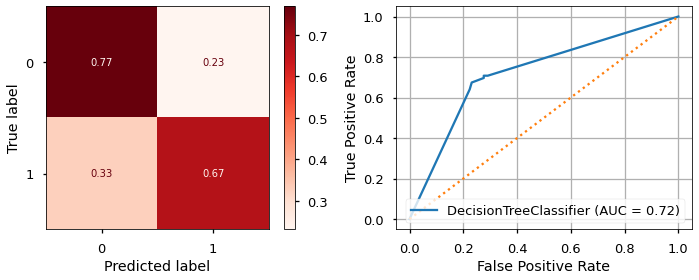

Training Score = 0.98
Test Score = 0.73


In [39]:
## Create, fit, and evaluate a vanilla DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train_df,y_train)
clf.score(X_train_df,y_train)

## Evaluate
evaluate_classification(clf,X_test_df,y_test,X_train=X_train_df,
                       y_train=y_train);

### Feature Importance

In [40]:
## Check out feature importances
clf.feature_importances_

array([0.11081737, 0.23268648, 0.05203196, 0.02123746, 0.24215416,
       0.        , 0.30823281, 0.02035117, 0.0064673 , 0.00602128,
       0.        ])

In [41]:
## Make into a series
importance = pd.Series(clf.feature_importances_, X_train_df.columns)
importance

Pclass             0.11
Age                0.23
SibSp              0.05
Parch              0.02
Fare               0.24
Sex_female         0.00
Sex_male           0.31
Embarked_C         0.02
Embarked_Q         0.01
Embarked_S         0.01
Embarked_missing   0.00
dtype: float64

<AxesSubplot:>

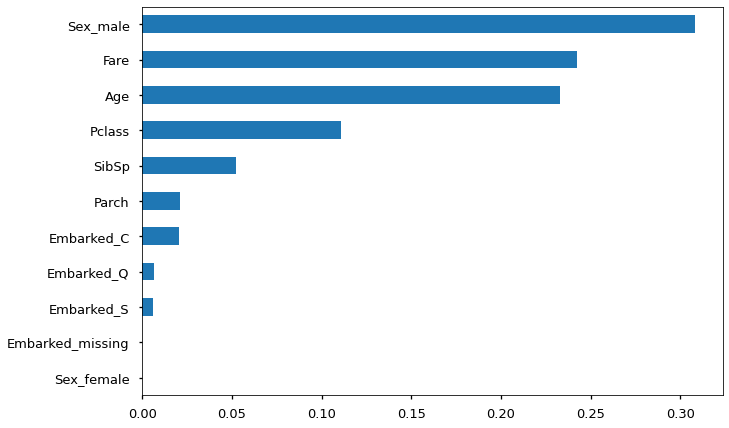

In [42]:
## sort values and plot kind='barh'
importance.sort_values().plot(kind='barh')

#### Functionizing feature importance

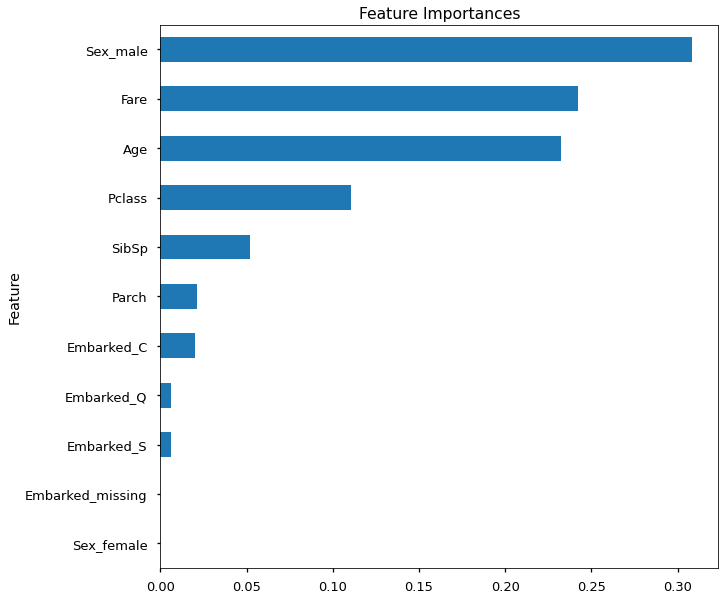

In [43]:
## Combine into a function
def plot_importance(tree, X_train_df, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train_df.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize,title='Feature Importances',
    ylabel='Feature',)
    return df_importance

plot_importance(clf,X_train_df);

### Plot the decision tree 

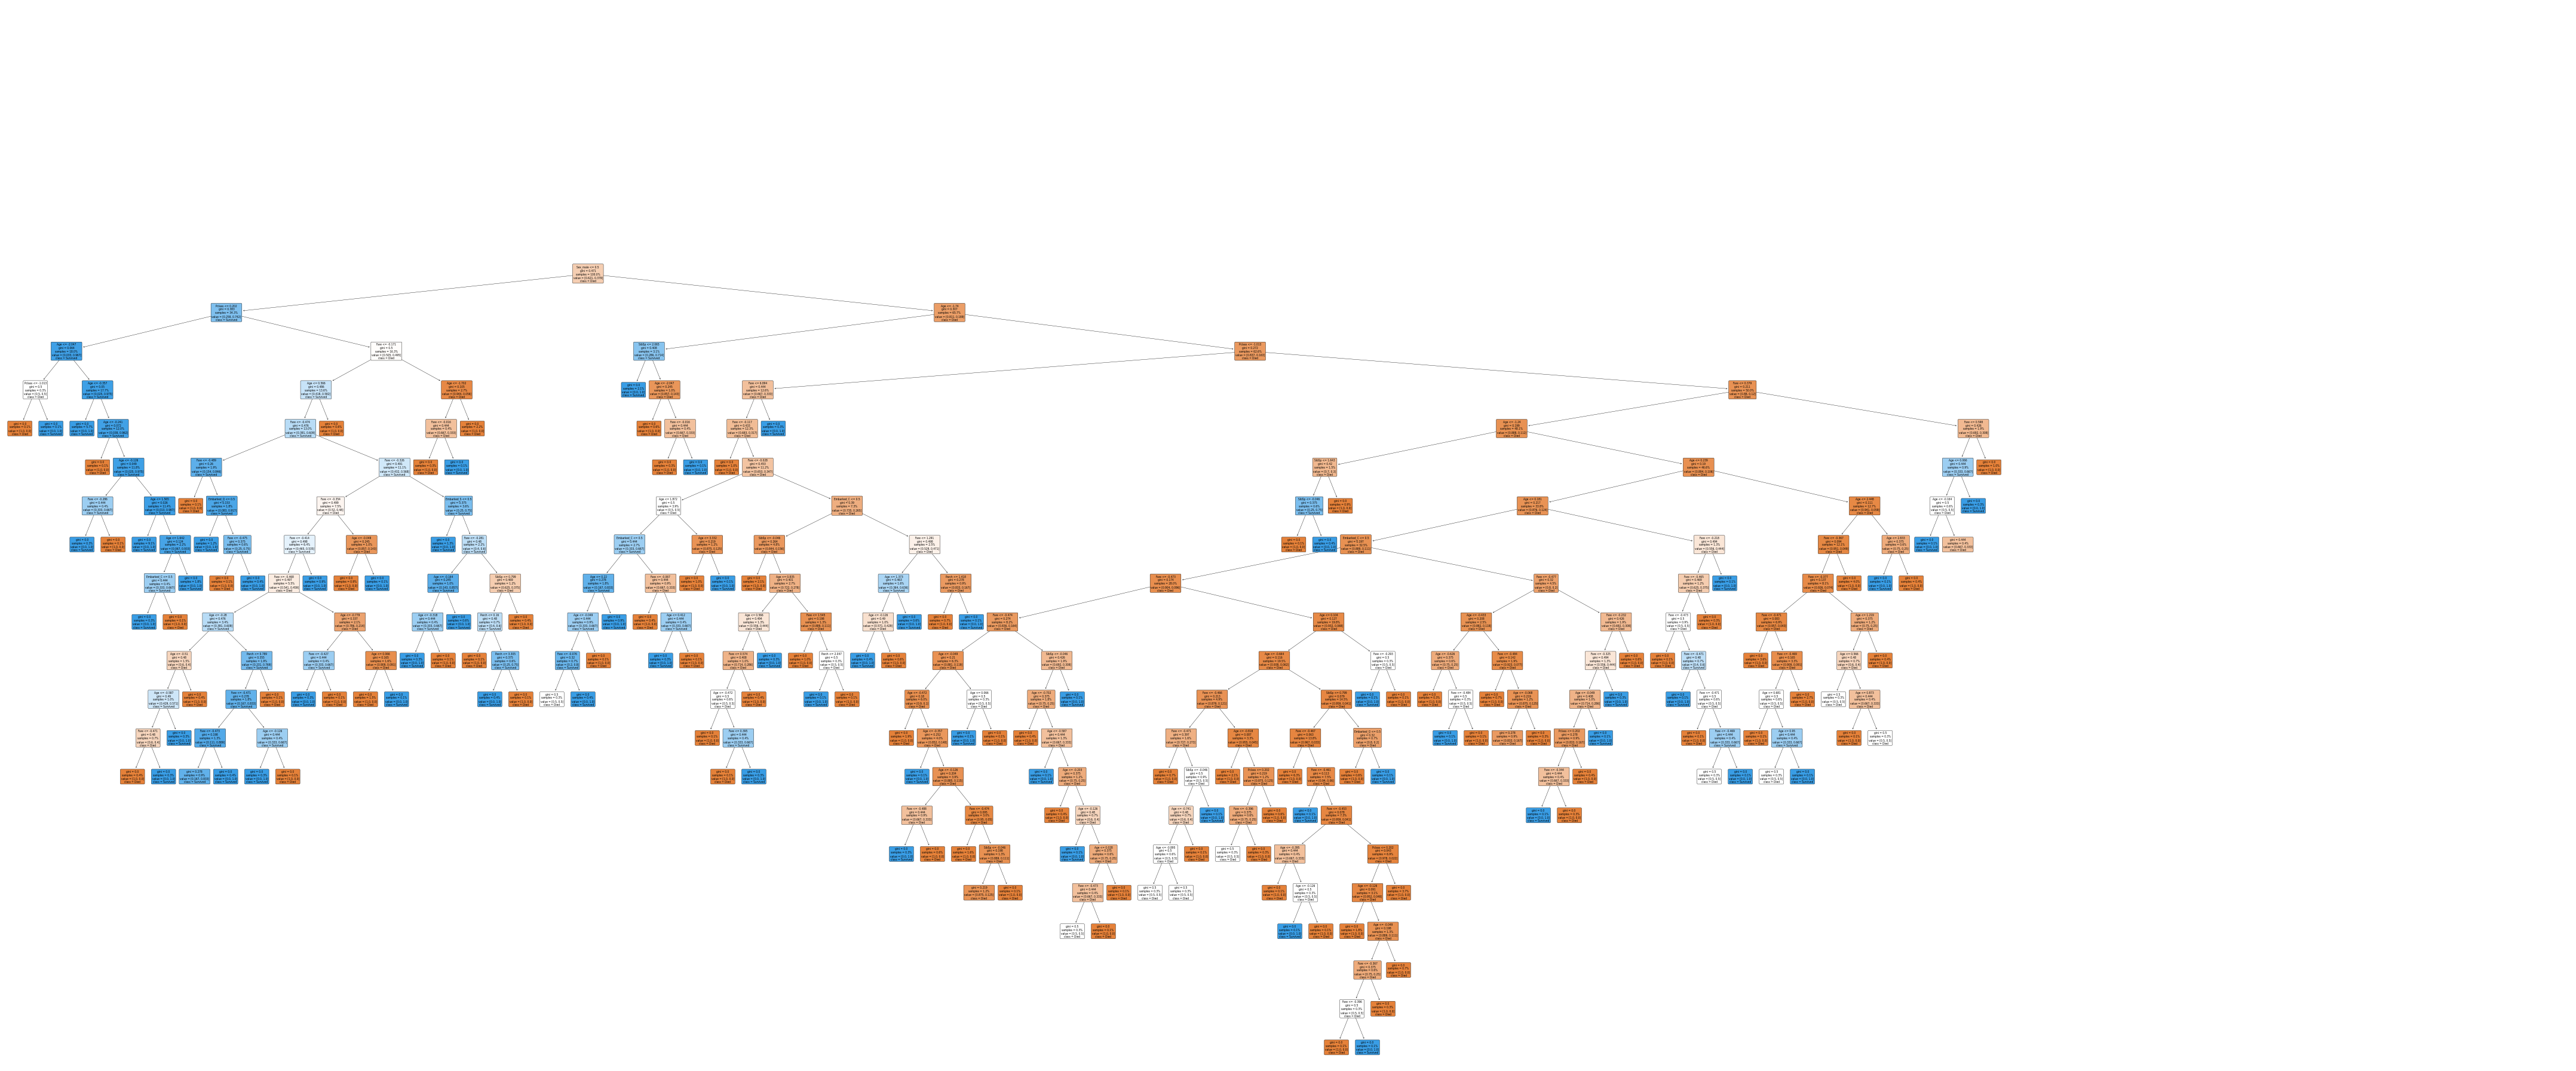

In [44]:
## Plot_tree from sklearn
fig,ax = plt.subplots(figsize=(60,25))
plot_tree(clf,filled=True,rounded=True,proportion=True,
          feature_names=X_train_df.columns,
          class_names=['Died','Survived'],ax=ax);
fig.tight_layout()
# fig.savefig('titanic_tree.pdf', dpi=300,orientation='landscape')

#### Functionize showing tree

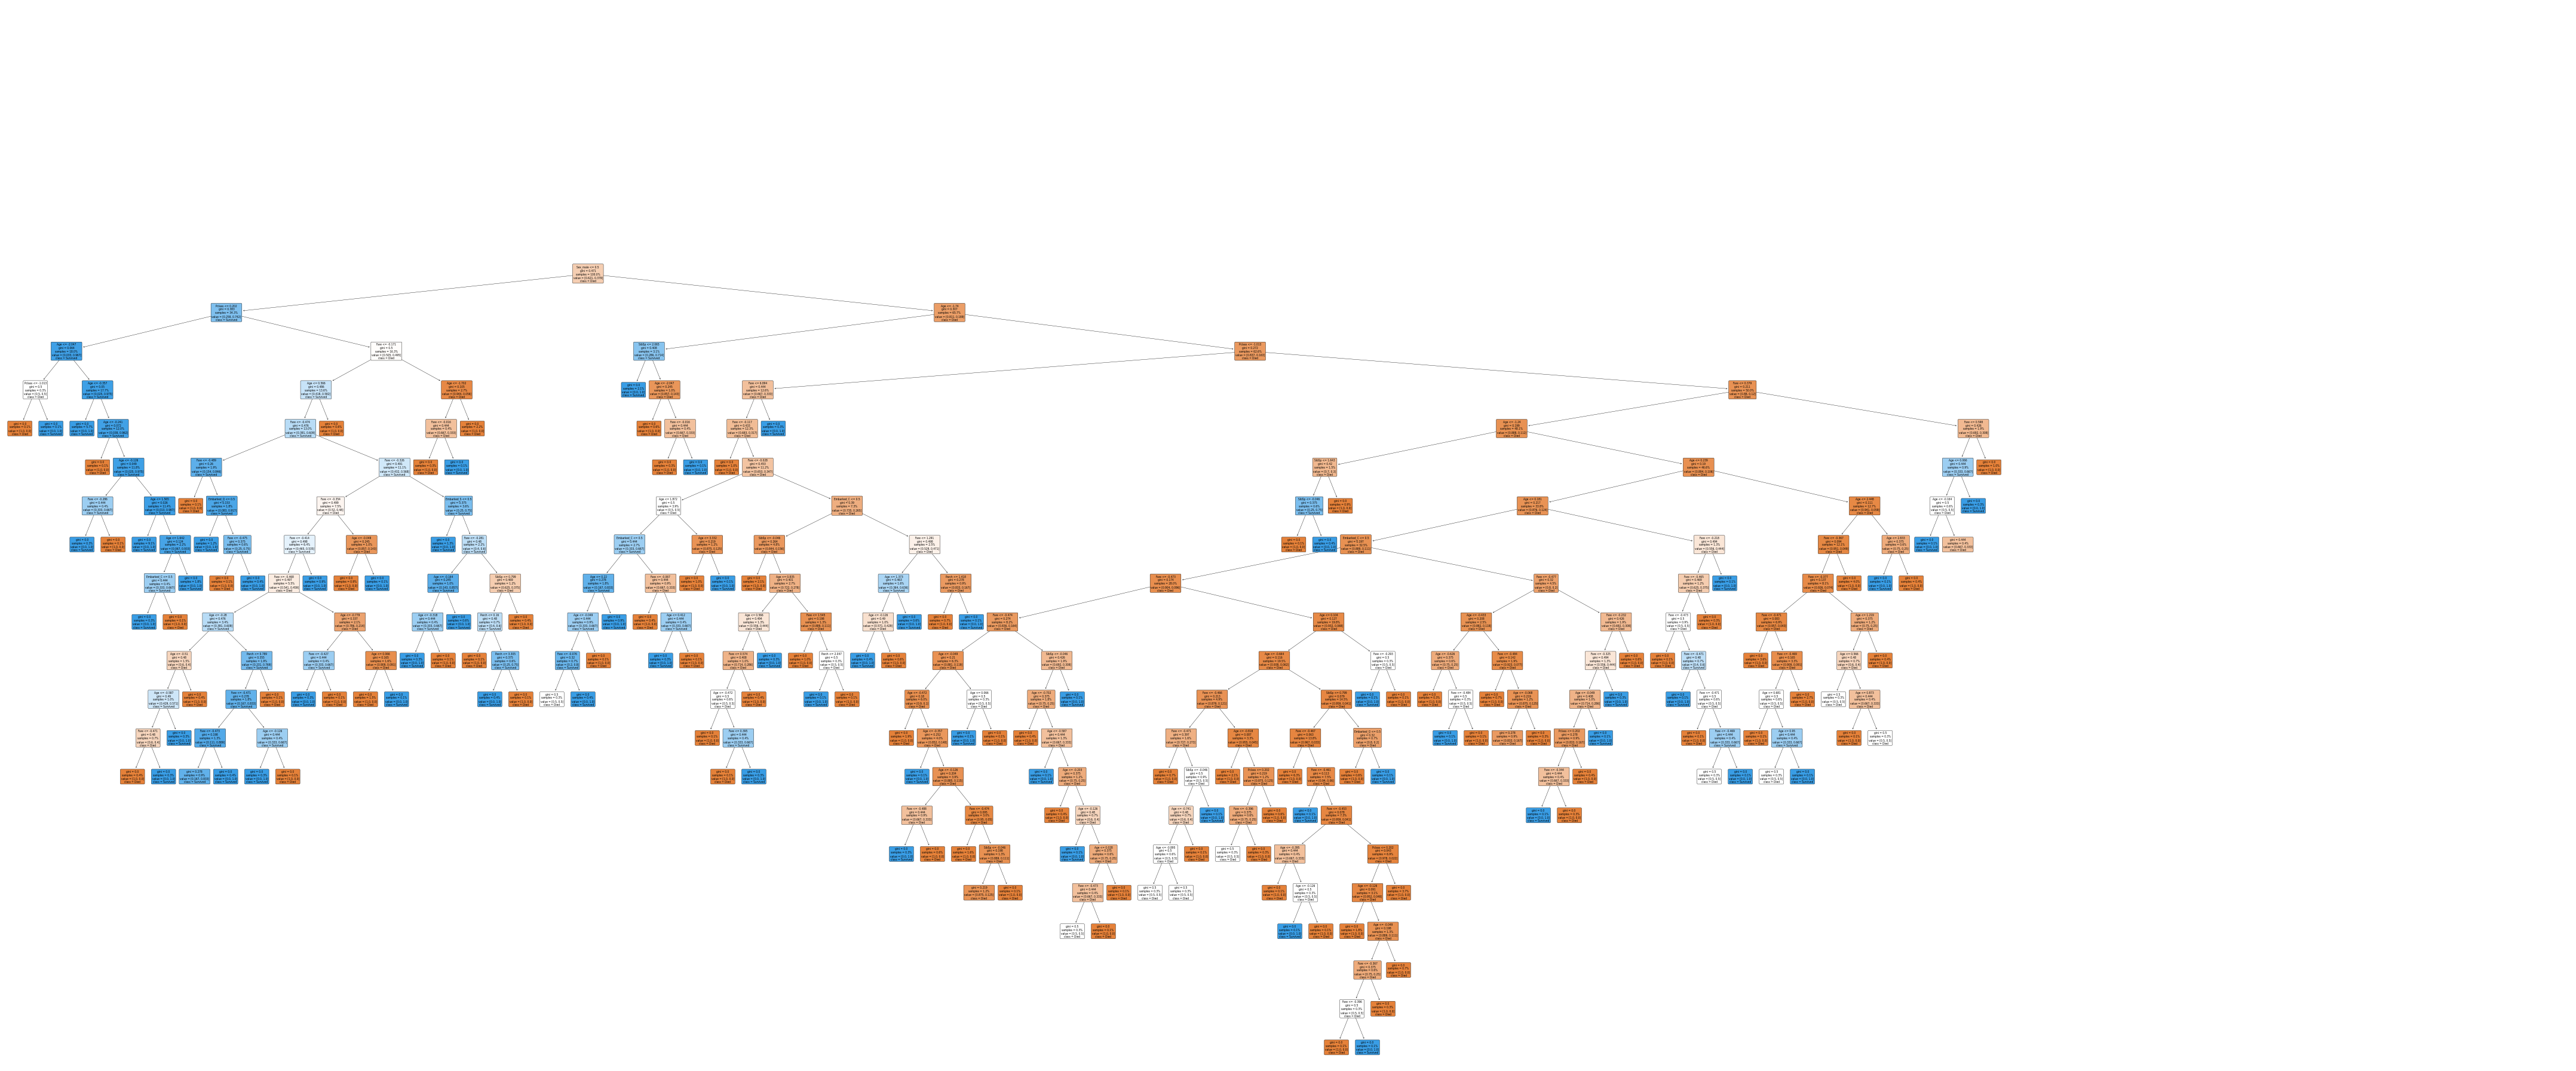

In [45]:
def show_tree(clf,figsize=(60,25),class_names=['Died','Survived'],
              savefig=False,fname='titanic_tree.pdf'):
    
    fig,ax = plt.subplots(figsize=figsize)
    plot_tree(clf,filled=True,rounded=True,proportion=True,
              feature_names=X_train_df.columns,
              class_names=class_names,ax=ax);
    fig.tight_layout()
    
    if savefig:
        fig.savefig(fname, dpi=300,orientation='landscape')
        
show_tree(clf)

## Hyperparameter Tuning - Pruning Our Trees


### Vanilla DecisionTree (baseline)

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train_df,y_train)
tree.score(X_train_df,y_train)

0.9805389221556886

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       134
           1       0.66      0.67      0.67        89

    accuracy                           0.73       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.73      0.73       223



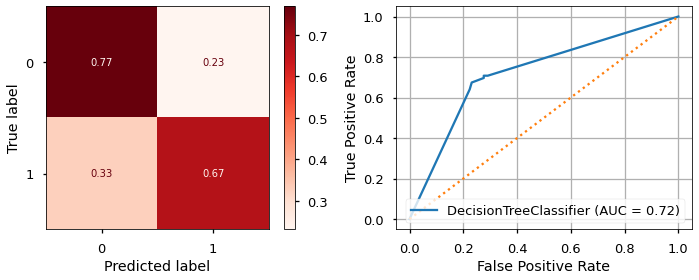

Training Score = 0.98
Test Score = 0.73


Pclass             0.11
Age                0.24
SibSp              0.06
Parch              0.01
Fare               0.24
Sex_female         0.31
Sex_male           0.00
Embarked_C         0.01
Embarked_Q         0.00
Embarked_S         0.02
Embarked_missing   0.00
dtype: float64

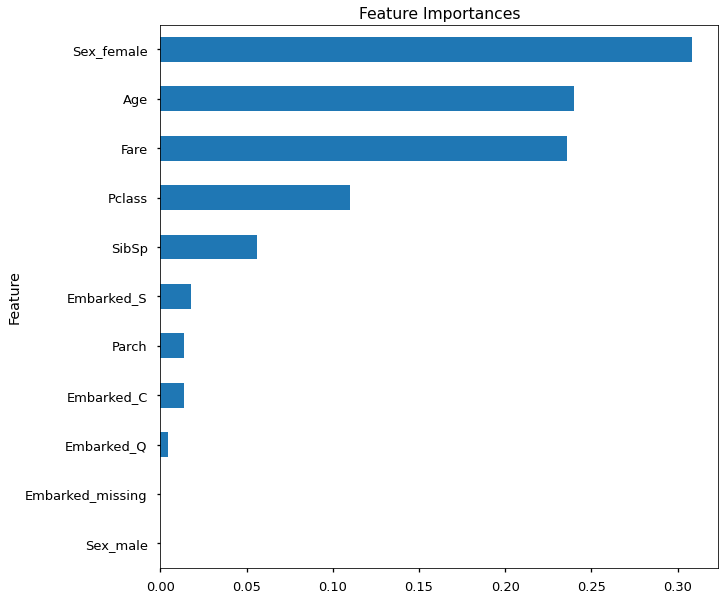

In [47]:
## Evaluate
evaluate_classification(tree,X_test_df,y_test,X_train=X_train_df,
                       y_train=y_train);

## plot feature  importance
plot_importance(tree,X_test_df)

## Pruning our DecisionTreeClassifier

### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

> - Let's try tuning max-depth, min_samples_leaf, and class_weight first. 

The best parameters were:
	 {'class_weight': None, 'max_depth': 25, 'min_samples_leaf': 5}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       134
           1       0.84      0.73      0.78        89

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



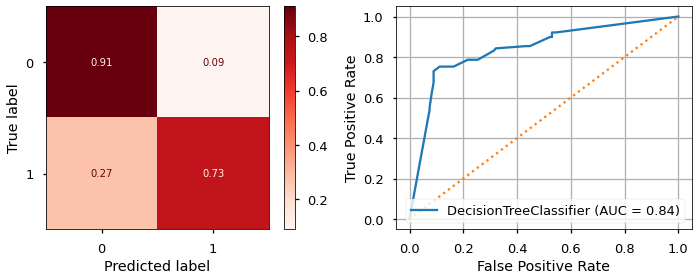

Training Score = 0.88
Test Score = 0.84


In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

## Set up param grid
params = {'max_depth':[None,5,10,20,25],
          'min_samples_leaf':[1,3,5],
         'class_weight':[None, 'balanced']}

## Instantiate & Fit GridSearchCV
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1)
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

> - Remember, GridSearchCV uses accuracy by default (for classification models).
    - Try other scoring metrics

The best parameters were:
	 {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 5}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       134
           1       0.71      0.81      0.76        89

    accuracy                           0.79       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.80      0.79      0.80       223



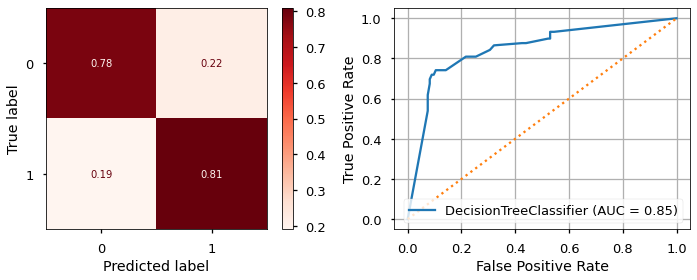

Training Score = 0.87
Test Score = 0.79


In [49]:
## Try scoring='recall'

gridsearch = GridSearchCV(DecisionTreeClassifier(),params,cv=3,n_jobs=-1,
                          scoring='recall')
## Fit searchc
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

The best parameters were:
	 {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       134
           1       0.72      0.80      0.76        89

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.79      0.80       223



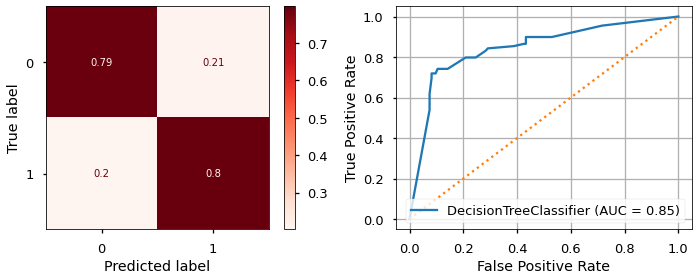

Training Score = 0.87
Test Score = 0.79


In [50]:
## Try scoring='recall_macro'
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,cv=3,
                          n_jobs=-1,scoring='recall_macro')
## Fit searchc
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

The best parameters were:
	 {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       134
           1       0.72      0.80      0.76        89

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.79      0.80       223



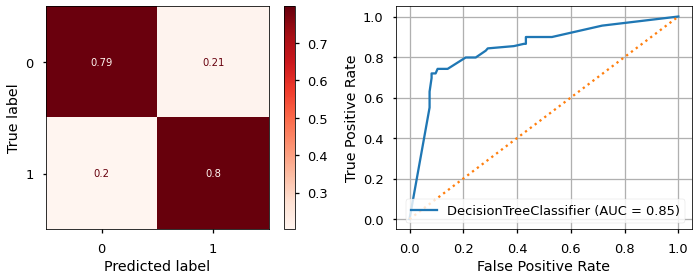

Training Score = 0.87
Test Score = 0.79


In [51]:
## Try scoring='f1'
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,cv=3,
                          n_jobs=-1,scoring='f1')
## Fit searchc
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

The best parameters were:
	 {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 3}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       134
           1       0.68      0.75      0.71        89

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.76      0.76      0.76       223



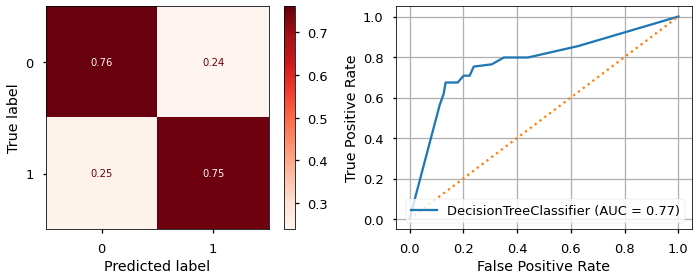

Training Score = 0.89
Test Score = 0.76


In [52]:
## Try scoring='f1'
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,cv=3,
                          n_jobs=-1,scoring='f1_macro')
## Fit searchc
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

### Tuning More Hyperparameters

> - Add `criterion`,`max_features` 


- `max_features`
    - If int, then consider max_features features at each split.
    - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.

The best parameters were:
	 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       134
           1       0.72      0.74      0.73        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



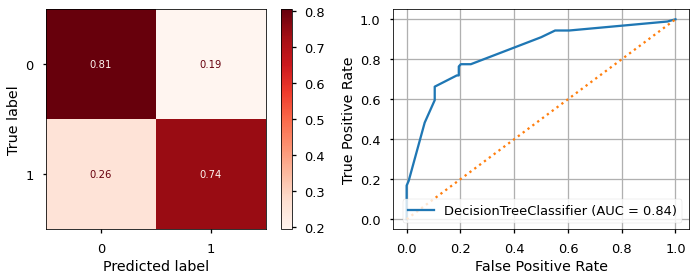

Training Score = 0.80
Test Score = 0.78


In [53]:

## Set up param grid
params = {'max_depth':[None,5,10,15,20,25],
         'class_weight':[None, 'balanced'],
         'min_samples_leaf':[1,3,5],
         'criterion':['gini','entropy'],
         'max_features':['auto','sqrt','log2',None]}

## Instantiate & Fit GridSearchCV
gridsearch = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1,
                          scoring='recall_macro')
gridsearch.fit(X_train_df,y_train)

## Evaluate with our function
evaluate_grid(gridsearch,X_test_df,y_test, X_train=X_train_df, y_train=y_train)

In [54]:
# gridsearch.best_estimator_.get_depth()

# APPENDIX

### Plot Trees with Graphviz 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

In [55]:
# # Create DOT data
# dot_data = export_graphviz(clf, out_file=None, 
#                            feature_names=X_train_df.columns,  
#                            class_names=['No Game','Play Game'],#np.unique(y).astype('str'), 
#                            filled=True, rounded=True,proportion=True,
#                            special_characters=True)

# # Draw graph
# graph = graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [56]:
# def viz_tree(clf,X_train_df,y):
#     # Create DOT data
#     dot_data = export_graphviz(clf, out_file=None, 
#                                feature_names=X_train_df.columns,  
#                                class_names=np.unique(y).astype('str'), 
#                                filled=True, rounded=True,#proportion=True,
#                                special_characters=True)

#     # Draw graph
#     graph = graph_from_dot_data(dot_data)  

#     # Show graph
#     return Image(graph.create_png())

In [57]:
# viz_tree(clf,X_train_df,y)

## Comparing Our Models So Far

In [58]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors


## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [59]:
## Check class
y_train.value_counts(normalize=True)

0   0.62
1   0.38
Name: Survived, dtype: float64

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_df, y_train)

In [61]:
pd.Series(y_train_res).value_counts()

1    415
0    415
Name: Survived, dtype: int64

Training Score: 0.9843373493975903
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       134
           1       0.66      0.70      0.68        89

    accuracy                           0.74       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.74      0.74      0.74       223



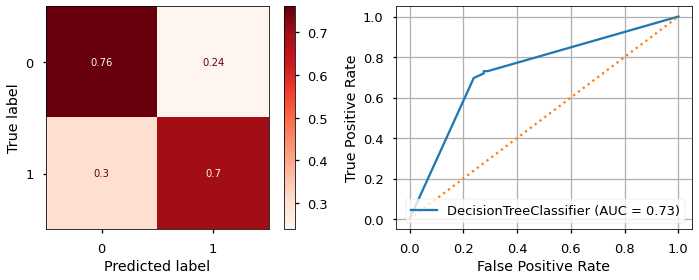

Training Score = 0.98
Test Score = 0.74


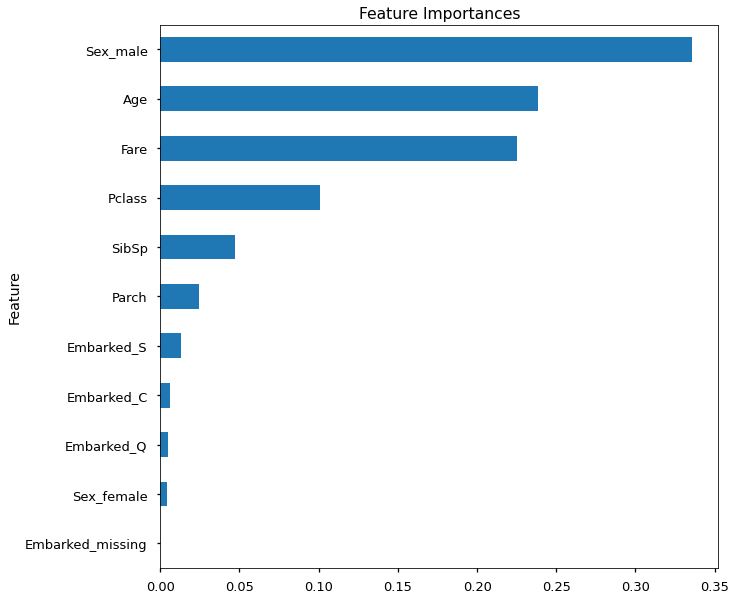

In [62]:
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_res,y_train_res)
print('Training Score:',tree.score(X_train_res,y_train_res))
evaluate_classification(tree, X_test_df,y_test,X_train=X_train_df,y_train=y_train)

plot_importance(tree,X_train_df);

In [63]:
visualize_tree(tree,show=False,feature_names=X_train_tf.columns,save_filename='big_tree.png')

NameError: name 'visualize_tree' is not defined